In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import truncnorm, norm
import pandas as pd
import time

## Q4

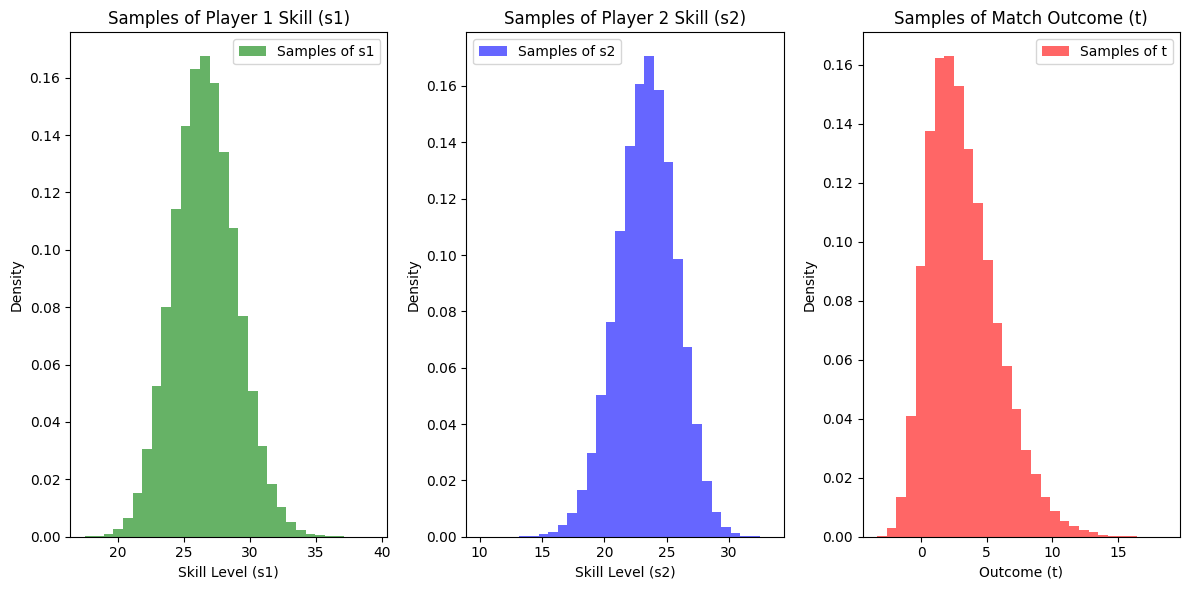

In [7]:
# Define parameters
mu_1 = 25  # Prior mean of player 1 skill
sigma_1 = np.sqrt(25/3)  # Prior std dev of player 1 skill
mu_2 = 25  # Prior mean of player 2 skill
sigma_2 = np.sqrt(25/3)  # Prior std dev of player 2 skill
sigma_t = 1  # Standard deviation of the match outcome

# Function to sample t given s1 and s2
def sample_t(s1, s2, sigma_t):
    return np.random.normal(s1 - s2, sigma_t)

# Function to sample s = [s1, s2] given t using joint normal
def sample_s_given_t(t, mu_1, mu_2, sigma_1, sigma_2):
    # Compute the conditional means and variances
    variance_s1 = sigma_1**2
    variance_s2 = sigma_2**2

    # Define A matrix and b vector
    A = np.array([[1, -1]])  # For the linear combination t = s1 - s2
    Sigma_s = np.array([[variance_s1, 0], [0, variance_s2]])  # Covariance matrix for s1 and s2
    b = np.array([t])

    # Conditional distribution of s given t
    inv_sigma_t = 1 / (sigma_t**2)  # Inverse of scalar sigma_t^2
    cov_s_given_t = np.linalg.inv(A.T @ A * inv_sigma_t + np.linalg.inv(Sigma_s))
    mean_s_given_t = cov_s_given_t @ (A.T * inv_sigma_t @ b + np.linalg.inv(Sigma_s) @ np.array([mu_1, mu_2]))

    # Draw a sample from the conditional distribution
    return np.random.multivariate_normal(mean_s_given_t, cov_s_given_t)

# Gibbs Sampling with Burn-in
def gibbs_sampling(num_samples, burn_in, initial_s1, initial_s2):
    s1_samples = [initial_s1]
    s2_samples = [initial_s2]
    t_samples = []

    # Iterate to generate samples
    for _ in range(num_samples):
        # Sample t given s1 and s2
        s1_current = s1_samples[-1]
        s2_current = s2_samples[-1]
        t_new = sample_t(s1_current, s2_current, sigma_t)
        t_samples.append(t_new)

        # Sample s = [s1, s2] given t, with rejection if s1 <= s2
        while True:
            s_new = sample_s_given_t(t_new, mu_1, mu_2, sigma_1, sigma_2)
            if s_new[0] > s_new[1]:  # Ensure s1 > s2
                s1_samples.append(s_new[0])
                s2_samples.append(s_new[1])
                break

    # Discard the burn-in samples
    return s1_samples[burn_in:], s2_samples[burn_in:], t_samples[burn_in:]

# Parameters for Gibbs sampling
num_samples = 100000
burn_in = 10000  # Number of samples to discard
initial_s1 = 26
initial_s2 = 24

# Perform Gibbs sampling
s1_samples, s2_samples, t_samples = gibbs_sampling(num_samples, burn_in, initial_s1, initial_s2)

# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(s1_samples, bins=30, density=True, alpha=0.6, color='g', label='Samples of s1')
plt.title('Samples of Player 1 Skill (s1)')
plt.xlabel('Skill Level (s1)')
plt.ylabel('Density')
plt.legend()

plt.subplot(1, 3, 2)
plt.hist(s2_samples, bins=30, density=True, alpha=0.6, color='b', label='Samples of s2')
plt.title('Samples of Player 2 Skill (s2)')
plt.xlabel('Skill Level (s2)')
plt.ylabel('Density')
plt.legend()

plt.subplot(1, 3, 3)
plt.hist(t_samples, bins=30, density=True, alpha=0.6, color='r', label='Samples of t')
plt.title('Samples of Match Outcome (t)')
plt.xlabel('Outcome (t)')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()


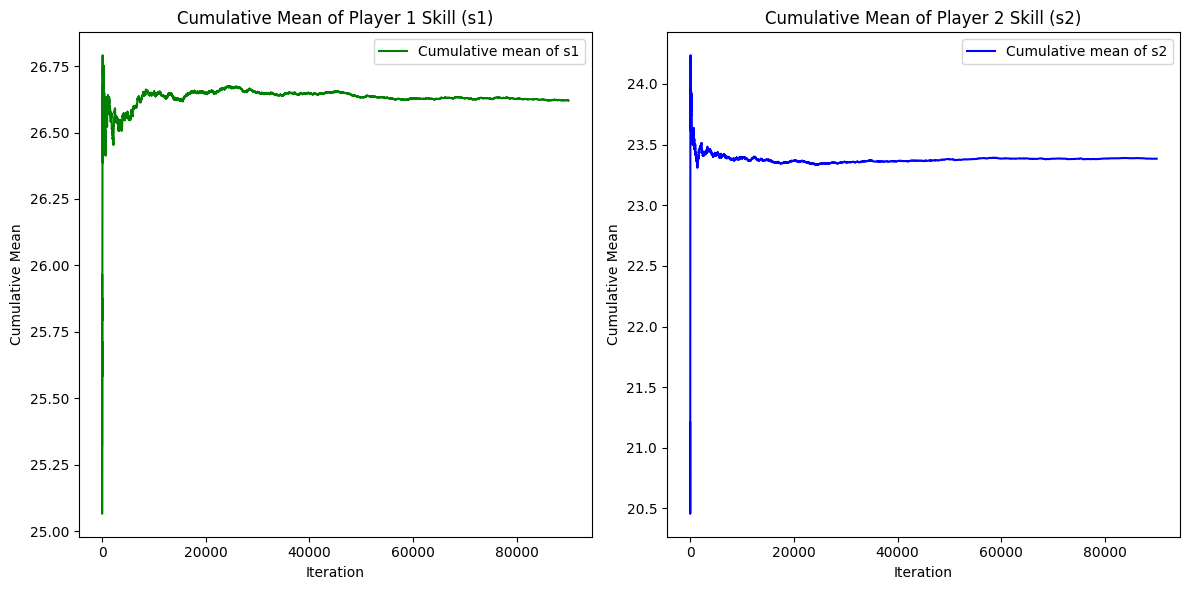

In [8]:
# Calculating cumulative means
s1_cumulative_mean = np.cumsum(s1_samples) / np.arange(1, len(s1_samples) + 1)
s2_cumulative_mean = np.cumsum(s2_samples) / np.arange(1, len(s2_samples) + 1)

# Plotting the cumulative mean for Player 1 Skill (s1) and Player 2 Skill (s2)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(s1_cumulative_mean, label='Cumulative mean of s1', color='g')
plt.title('Cumulative Mean of Player 1 Skill (s1)')
plt.xlabel('Iteration')
plt.ylabel('Cumulative Mean')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(s2_cumulative_mean, label='Cumulative mean of s2', color='b')
plt.title('Cumulative Mean of Player 2 Skill (s2)')
plt.xlabel('Iteration')
plt.ylabel('Cumulative Mean')
plt.legend()

plt.tight_layout()
plt.show()

C:\Users\ondre\AppData\Local\Temp\ipykernel_22852\964178509.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(s1_samples, label="Posterior of s1", shade=True)
C:\Users\ondre\AppData\Local\Temp\ipykernel_22852\964178509.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(s2_samples, label="Posterior of s2", shade=True)


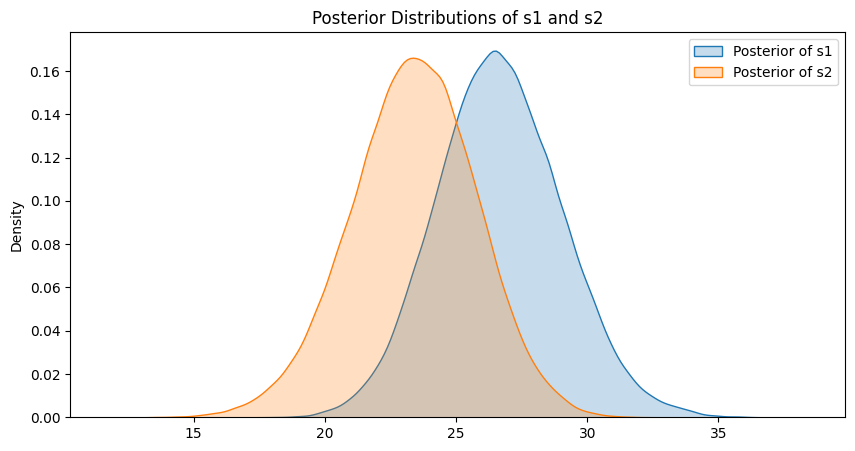

In [15]:
# Plot posterior distributions of s1 and s2
plt.figure(figsize=(10, 5))
sns.kdeplot(s1_samples, label="Posterior of s1", shade=True)
sns.kdeplot(s2_samples, label="Posterior of s2", shade=True)

plt.legend()
plt.title("Posterior Distributions of s1 and s2")
plt.show()


C:\Users\ondre\AppData\Local\Temp\ipykernel_16060\865611466.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(s1_samples, label="Posterior of s1", shade=True)
C:\Users\ondre\AppData\Local\Temp\ipykernel_16060\865611466.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(s2_samples, label="Posterior of s2", shade=True)


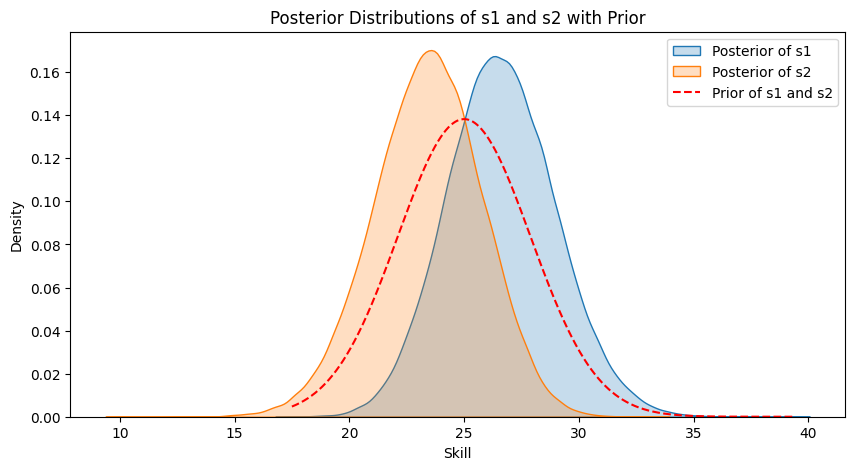

In [18]:


# Assuming s1_samples and s2_samples are already defined
# If not, you'll need to load/generate these samples first.

# Parameters for the normal distribution of player 1
mu_1 = 25  # Prior mean of player 1 skill
sigma_1 = np.sqrt(25/3)  # Prior std dev of player 1 skill

# Generate values for the normal distribution of s1
x_values = np.linspace(min(s1_samples), max(s1_samples), 1000)
prior_s1 = norm.pdf(x_values, mu_1, sigma_1)

# Plot posterior distributions of s1 and s2
plt.figure(figsize=(10, 5))
sns.kdeplot(s1_samples, label="Posterior of s1", shade=True)
sns.kdeplot(s2_samples, label="Posterior of s2", shade=True)

# Plot the prior distribution of s1 (normal distribution)
plt.plot(x_values, prior_s1, label="Prior of s1 and s2", linestyle='--', color='red')

# Customize the plot
plt.legend()
plt.title("Posterior Distributions of s1 and s2 with Prior")
plt.xlabel("Skill")
plt.ylabel("Density")

# Show the plot
plt.show()


100
0.37583279609680176
[26.50314913 23.31782631] [[6.07544939 2.75736879]
 [2.75736879 5.88785112]]
200
0.64274001121521
[26.32049095 23.54324563] [[5.18520915 2.93467238]
 [2.93467238 5.12677362]]
500
2.9834752082824707
[26.62474808 23.3817869 ] [[5.613313   2.45230178]
 [2.45230178 5.76109927]]
1000
3.633934259414673
[26.5646633  23.38504523] [[5.6129993  2.7781956 ]
 [2.7781956  5.50869218]]
5000
17.54509711265564
[26.62670883 23.38121128] [[5.67523523 2.6364174 ]
 [2.6364174  5.69299324]]
10000
35.10708284378052
[26.63133905 23.38377025] [[5.69533682 2.66711128]
 [2.66711128 5.71984478]]


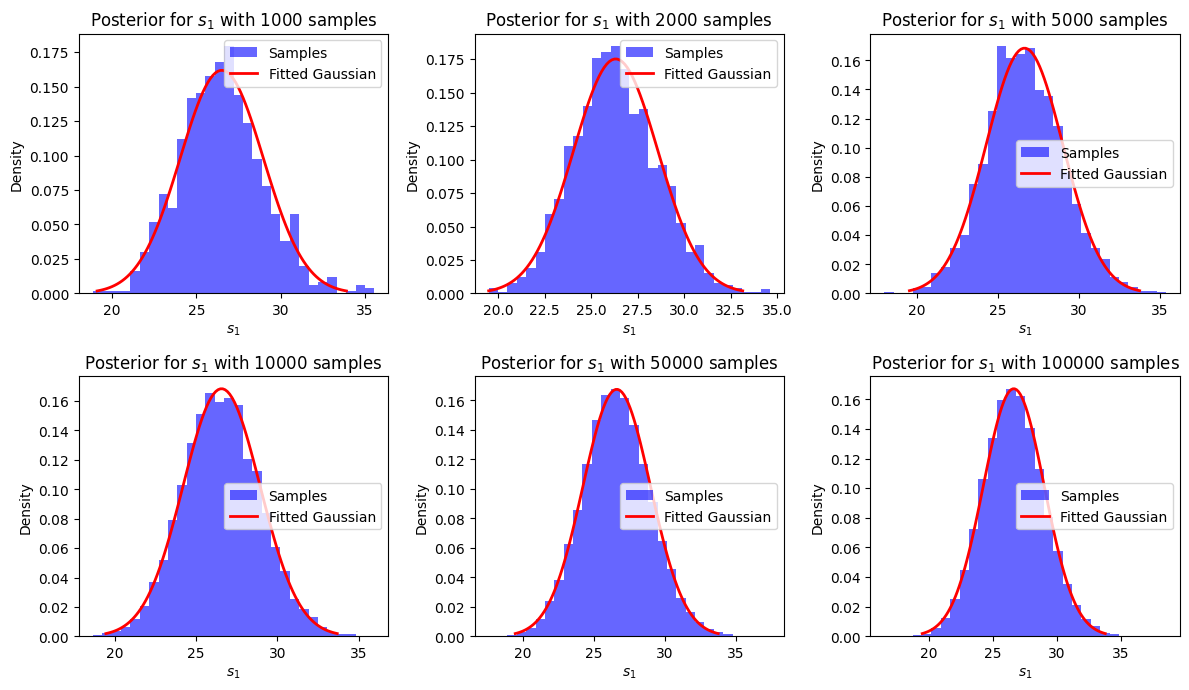

In [20]:
def fit_gaussian(samples):
    mean = np.mean(samples, axis=0)
    covariance = np.cov(samples, rowvar=False)
    return mean, covariance

def compare_samples(sample_sizes):


    plt.figure(figsize=(12, 10))
    
    for i, size in enumerate(sample_sizes):

        timee = time.time()
        
        burn_in = int(size * 0.1)  # 10% of sample size
        print(burn_in)

        sample1, sample2, sample_t = gibbs_sampling(num_samples=size, burn_in=burn_in, initial_s1=25, initial_s2=25)

        print(time.time() - timee)

        samples = np.array([list(i) for i in zip(sample1, sample2)])

        mean, covariance = fit_gaussian(samples)

        print(mean, covariance)

        plt.subplot(3, 3, i+1)
        plt.hist(samples[:, 0], bins=30, density=True, alpha=0.6, color='b', label='Samples')
        x = np.linspace(mean[0] - 3*np.sqrt(covariance[0, 0]), mean[0] + 3*np.sqrt(covariance[0, 0]), 100)
        plt.plot(x, norm.pdf(x, mean[0], np.sqrt(covariance[0, 0])), 'r', lw=2, label='Fitted Gaussian')
        plt.title(f'Posterior for $s_1$ with {size} samples')
        plt.xlabel('$s_1$')
        plt.ylabel('Density')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Define sample sizes and burn-in
sample_sizes = [1000, 2000, 5000, 10000, 50000, 100000]

# Compare samples
compare_samples(sample_sizes)

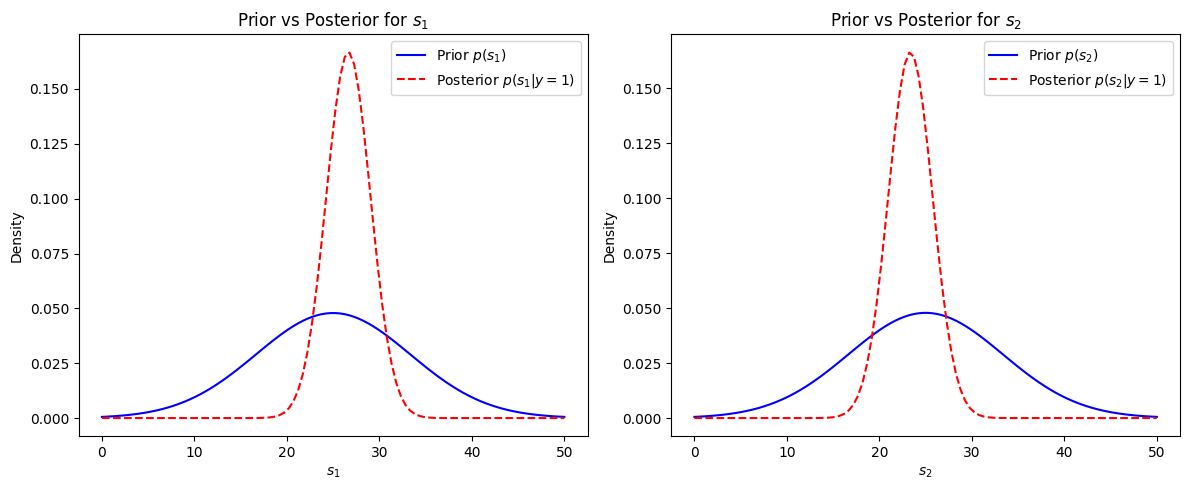

In [16]:
def plot_prior_vs_posterior(prior_mean, prior_std, posterior_mean, posterior_std):
    x = np.linspace(0, 50, 100)

    # Prior for s1 and s2
    prior_s1 = norm.pdf(x, prior_mean, prior_std)
    prior_s2 = norm.pdf(x, prior_mean, prior_std)

    plt.figure(figsize=(12, 5))

    # Prior vs Posterior for s1
    plt.subplot(1, 2, 1)
    plt.plot(x, prior_s1, 'b-', label='Prior $p(s_1)$')
    plt.plot(x, norm.pdf(x, posterior_mean[0], posterior_std[0]), 'r--', label='Posterior $p(s_1 | y=1)$')
    plt.title('Prior vs Posterior for $s_1$')
    plt.xlabel('$s_1$')
    plt.ylabel('Density')
    plt.legend()

    # Prior vs Posterior for s2
    plt.subplot(1, 2, 2)
    plt.plot(x, prior_s2, 'b-', label='Prior $p(s_2)$')
    plt.plot(x, norm.pdf(x, posterior_mean[1], posterior_std[1]), 'r--', label='Posterior $p(s_2 | y=1)$')
    plt.title('Prior vs Posterior for $s_2$')
    plt.xlabel('$s_2$')
    plt.ylabel('Density')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Define prior mean and standard deviation
posterior_mean = [np.mean(s1_samples), np.mean(s2_samples)]
posterior_std = [np.std(s1_samples), np.std(s2_samples)]

# Compare prior and posterior
plot_prior_vs_posterior(25, 25/3, posterior_mean=posterior_mean, posterior_std=posterior_std)


## Q5

#### Using rejection sampling

In [ ]:
# Sample data for Serie A matches (replace this with the full dataset)
data = pd.read_csv('SerieA.csv')

# Initialize parameters
initial_mean_skill = 25.0  # Initial mean skill for each team
initial_variance = 25.0 / 3  # Initial variance for each team's skill
sigma_t = 1.0  # Standard deviation for match outcomes

# Initialize skills for each team
teams = set(data['team1']).union(set(data['team2']))
skills = {team: [initial_mean_skill, np.sqrt(initial_variance)] for team in teams}

# Function to sample t given s1 and s2
def sample_t(s1, s2, sigma_t):
    return np.random.normal(s1 - s2, sigma_t)

# Function to sample s = [s1, s2] given t using joint normal
def sample_s_given_t(t, mu_1, mu_2, sigma_1, sigma_2, sigma_t):
    variance_s1 = sigma_1**2
    variance_s2 = sigma_2**2

    # Precompute components for efficiency
    A = np.array([[1, -1]])
    Sigma_s_inv = np.array([[1 / variance_s1, 0], [0, 1 / variance_s2]])
    
    inv_sigma_t = 1 / (sigma_t**2)
    cov_s_given_t = np.linalg.inv(A.T @ A * inv_sigma_t + Sigma_s_inv)
    
    # Ensure the mean vector is one-dimensional
    mean_s_given_t = cov_s_given_t @ (A.T * inv_sigma_t * t + Sigma_s_inv @ np.array([[mu_1], [mu_2]]))

    # Convert the mean vector to a 1D array
    mean_s_given_t = mean_s_given_t.flatten()

    # Draw a sample from the conditional distribution
    return np.random.multivariate_normal(mean_s_given_t, cov_s_given_t)

# Gibbs Sampling with Burn-in
def gibbs_sampling(num_samples, burn_in, initial_s1, initial_s2):
    s1_samples = np.zeros(num_samples)
    s2_samples = np.zeros(num_samples)

    # Initialize first samples
    s1_samples[0] = initial_s1[0]
    s2_samples[0] = initial_s2[0]

    for i in range(1, num_samples):
        s1_current = s1_samples[i - 1]
        s2_current = s2_samples[i - 1]
        
        t_new = sample_t(s1_current, s2_current, sigma_t)
        
        # Sample s given t
        while True:
            s_new = sample_s_given_t(t_new, initial_s1[0], initial_s2[0], initial_s1[1], initial_s2[1], sigma_t)

            if s_new[0] > s_new[1]:  # Ensure s1 > s2
                s1_samples[i] = s_new[0]
                s2_samples[i] = s_new[1]
                break

    return s1_samples[burn_in:], s2_samples[burn_in:]

# Parameters for Gibbs sampling
num_samples = 10000
burn_in = 500  # Number of samples to discard


for idx, row in data.iterrows():
    team1, team2 = row['team1'], row['team2']
    score1, score2 = row['score1'], row['score2']

    # Skip draws
    if score1 == score2:
        continue

    # Get initial skills for teams
    s1_initial = skills[team1]
    s2_initial = skills[team2]

    print(f"Initial skills for {team1}: Mean = {s1_initial[0]}, Variance = {s1_initial[1]**2}")
    print(f"Initial skills for {team2}: Mean = {s2_initial[0]}, Variance = {s2_initial[1]**2}")

    # Perform Gibbs sampling
    if score1 > score2:
        s1_samples, s2_samples = gibbs_sampling(num_samples, burn_in, s1_initial, s2_initial)
    else:
        s2_samples, s1_samples = gibbs_sampling(num_samples, burn_in, s2_initial, s1_initial)

    skills[team1] = [np.mean(s1_samples), np.std(s1_samples)]
    skills[team2] = [np.mean(s2_samples), np.std(s2_samples)]

    print(f"Updated skills for {team1}: Mean = {skills[team1][0]}, Variance = {skills[team1][1]**2}")
    print(f"Updated skills for {team2}: Mean = {skills[team2][0]}, Variance = {skills[team2][1]**2}")
    print()


#### Using truncated normal

In [12]:
# Sample data for Serie A matches (replace this with the full dataset)
data = pd.read_csv('SerieA.csv')

shuffle = False

if shuffle:
    # Shuffle the order of the DataFrame
    shuffled_data = data.sample(frac=1, random_state=1).reset_index(drop=True)
    data = shuffled_data

# Initialize parameters
initial_mean_skill = 25.0  # Initial mean skill for each team
initial_variance = 25.0 / 3  # Initial variance for each team's skill
sigma_t = 1.0  # Standard deviation for match outcomes

# Initialize skills for each team
teams = set(data['team1']).union(set(data['team2']))
skills = {team: [initial_mean_skill, np.sqrt(initial_variance)] for team in teams}

# Function to sample t given s1 and s2
def sample_t(s1, s2, sigma_t):
    return np.random.normal(s1 - s2, sigma_t)

# Truncated Gaussian helper function for sampling with truncation
def truncated_gaussian(mean, std, lower_bound, upper_bound):
    a, b = (lower_bound - mean) / std, (upper_bound - mean) / std
    return truncnorm.rvs(a, b, loc=mean, scale=std)

# Function to sample s = [s1, s2] given t using truncated normal
def sample_s_given_t(t, mu_1, mu_2, sigma_1, sigma_2, sigma_t):
    variance_s1 = sigma_1**2
    variance_s2 = sigma_2**2

    # Precompute components for efficiency
    A = np.array([[1, -1]])
    Sigma_s_inv = np.array([[1 / variance_s1, 0], [0, 1 / variance_s2]])
    
    inv_sigma_t = 1 / (sigma_t**2)
    cov_s_given_t = np.linalg.inv(A.T @ A * inv_sigma_t + Sigma_s_inv)
    
    # Ensure the mean vector is one-dimensional
    mean_s_given_t = cov_s_given_t @ (A.T * inv_sigma_t * t + Sigma_s_inv @ np.array([[mu_1], [mu_2]]))
    mean_s_given_t = mean_s_given_t.flatten()

    # Draw samples from the truncated normal distribution for s1 > s2
    s_diff_mean = mean_s_given_t[0] - mean_s_given_t[1]
    s_diff_std = np.sqrt(cov_s_given_t[0, 0] + cov_s_given_t[1, 1] - 2 * cov_s_given_t[0, 1])
    
    # Truncate so that s1 - s2 > 0
    s_diff = truncated_gaussian(s_diff_mean, s_diff_std, 0, np.inf)
    
    # Sample s2 and compute s1 = s2 + s_diff
    s2 = np.random.normal(mean_s_given_t[1], np.sqrt(cov_s_given_t[1, 1]))
    s1 = s2 + s_diff

    return [s1, s2]

# Gibbs Sampling with Burn-in
def gibbs_sampling(num_samples, burn_in, initial_s1, initial_s2):
    s1_samples = np.zeros(num_samples)
    s2_samples = np.zeros(num_samples)

    # Initialize first samples
    s1_samples[0] = initial_s1[0]
    s2_samples[0] = initial_s2[0]

    for i in range(1, num_samples):
        s1_current = s1_samples[i - 1]
        s2_current = s2_samples[i - 1]
        
        t_new = sample_t(s1_current, s2_current, sigma_t)
        
        # Sample s given t using truncated Gaussian
        s_new = sample_s_given_t(t_new, initial_s1[0], initial_s2[0], initial_s1[1], initial_s2[1], sigma_t)
        s1_samples[i] = s_new[0]
        s2_samples[i] = s_new[1]

    return s1_samples[burn_in:], s2_samples[burn_in:]

# Parameters for Gibbs sampling
num_samples = 10000
burn_in = 500  # Number of samples to discard


for idx, row in data.iterrows():
    team1, team2 = row['team1'], row['team2']
    score1, score2 = row['score1'], row['score2']

    # Skip draws
    if score1 == score2:
        continue

    # Get initial skills for teams
    s1_initial = skills[team1]
    s2_initial = skills[team2]

    # Perform Gibbs sampling
    if score1 > score2:
        s1_samples, s2_samples = gibbs_sampling(num_samples, burn_in, s1_initial, s2_initial)
    else:
        s2_samples, s1_samples = gibbs_sampling(num_samples, burn_in, s2_initial, s1_initial)

    skills[team1] = [np.mean(s1_samples), np.std(s1_samples)]
    skills[team2] = [np.mean(s2_samples), np.std(s2_samples)]

    # Calculating cumulative means
    s1_cumulative_mean = np.cumsum(s1_samples) / np.arange(1, len(s1_samples) + 1)
    s2_cumulative_mean = np.cumsum(s2_samples) / np.arange(1, len(s2_samples) + 1)

    print(f"Initial skills for {team1}: Mean = {s1_initial[0]}, Variance = {s1_initial[1]**2}")
    print(f"Initial skills for {team2}: Mean = {s2_initial[0]}, Variance = {s2_initial[1]**2}")
    print(f"Updated skills for {team1}: Mean = {skills[team1][0]}, Variance = {skills[team1][1]**2}")
    print(f"Updated skills for {team2}: Mean = {skills[team2][0]}, Variance = {skills[team2][1]**2}")
    print()




Initial skills for Chievo: Mean = 25.0, Variance = 8.333333333333336
Initial skills for Juventus: Mean = 25.0, Variance = 8.333333333333336
Updated skills for Chievo: Mean = 23.502217358022204, Variance = 5.922888610302651
Updated skills for Juventus: Mean = 26.708687227594268, Variance = 6.388929330158565

Initial skills for Lazio: Mean = 25.0, Variance = 8.333333333333336
Initial skills for Napoli: Mean = 25.0, Variance = 8.333333333333336
Updated skills for Lazio: Mean = 23.465740259916835, Variance = 5.957293105996282
Updated skills for Napoli: Mean = 26.64333989371213, Variance = 6.267762531493985

Initial skills for Torino: Mean = 25.0, Variance = 8.333333333333336
Initial skills for Roma: Mean = 25.0, Variance = 8.333333333333336
Updated skills for Torino: Mean = 23.41082036288422, Variance = 5.991352281528077
Updated skills for Roma: Mean = 26.83939785780722, Variance = 6.508746133434035

Initial skills for Sassuolo: Mean = 25.0, Variance = 8.333333333333336
Initial skills for 

In [13]:
skills

{'Empoli': [28.57606958096559, 1.0749038160511053],
 'Frosinone': [26.292159704696722, 0.8725007932478793],
 'Inter': [29.732457076580282, 1.173781388452964],
 'Sassuolo': [26.39663163151449, 0.977322179848051],
 'Milan': [29.64068349966337, 1.2954064828224383],
 'Udinese': [29.18602472324921, 1.198402736173645],
 'Lazio': [27.90712004052954, 0.9678169632248095],
 'Napoli': [29.224735410835287, 1.1335180769462019],
 'Roma': [30.042517701927267, 1.4685658608306629],
 'Chievo': [26.719023808158664, 0.8849390693172331],
 'Torino': [29.150346008292086, 1.128196989575739],
 'Spal': [27.742519625338737, 1.016482449143004],
 'Sampdoria': [27.530146392966873, 1.053212637338124],
 'Juventus': [26.7679900683219, 1.0429471578429697],
 'Bologna': [30.073207190610695, 1.1782963910535387],
 'Cagliari': [27.20131024337181, 0.9115502922278376],
 'Fiorentina': [25.212676385895247, 0.7711135659059918],
 'Parma': [26.293457646379682, 0.9360093217399612],
 'Atalanta': [30.21583320450337, 1.626863620695442

In [14]:
# Sort the dictionary by the first element of each value list
sorted_data = dict(sorted(skills.items(), key=lambda x: x[1][0], reverse=True))

# Print the sorted dictionary
for team, values in sorted_data.items():
    print(f"{team}: {round(values[0],2)} , {round(values[1],2)}")

Atalanta: 30.22 , 1.63
Bologna: 30.07 , 1.18
Roma: 30.04 , 1.47
Inter: 29.73 , 1.17
Milan: 29.64 , 1.3
Napoli: 29.22 , 1.13
Udinese: 29.19 , 1.2
Torino: 29.15 , 1.13
Empoli: 28.58 , 1.07
Lazio: 27.91 , 0.97
Spal: 27.74 , 1.02
Sampdoria: 27.53 , 1.05
Cagliari: 27.2 , 0.91
Juventus: 26.77 , 1.04
Chievo: 26.72 , 0.88
Sassuolo: 26.4 , 0.98
Parma: 26.29 , 0.94
Frosinone: 26.29 , 0.87
Genoa: 26.04 , 0.99
Fiorentina: 25.21 , 0.77


### Q10

In [5]:
# Initialize a dictionary to store the points for each team
points = {}

# Function to update points for a match
def update_points(team1, team2, score1, score2):
    if team1 not in points:
        points[team1] = 0
    if team2 not in points:
        points[team2] = 0

    # Determine points based on the result
    if score1 > score2:
        points[team1] += 3  # team1 wins
    elif score2 > score1:
        points[team2] += 3  # team2 wins
    else:
        points[team1] += 1  # draw
        points[team2] += 1  # draw

# Function to check if a team has become the champion
def check_for_champion(total_matches_left):
    max_points = max(points.values())  # current max points
    leaders = [team for team, pts in points.items() if pts == max_points]  # teams with max points

    # The team with the most points should have a lead that can't be overcome
    second_max_points = max([pts for team, pts in points.items() if team not in leaders], default=0)
    
    if len(leaders) == 1:
        leader = leaders[0]
        remaining_points_possible = total_matches_left * 3
        if max_points > second_max_points + remaining_points_possible:
            print(f"The champion is {leader} with {max_points} points and {total_matches_left} matches left!")
            return True
    return False

# Iterate through the dataset, row by row
for idx, row in data.iterrows():
    team1 = row['team1']
    team2 = row['team2']
    score1 = row['score1']
    score2 = row['score2']

    # Update points for the current match
    update_points(team1, team2, score1, score2)

    # Calculate how many matches are left
    total_matches_left = len(data) - (idx + 1)

    # Check if any team has become the champion
    if check_for_champion(total_matches_left):
        break  # End the loop once a champion is found


The champion is Juventus with 90 points and 3 matches left!


In [16]:
# Sample data for Serie A matches (replace this with the full dataset)
data = pd.read_csv('SerieA.csv')

# Whether to shuffle the data or not
shuffle = False

if shuffle:
    # Shuffle the order of the DataFrame
    shuffled_data = data.sample(frac=1, random_state=1).reset_index(drop=True)
    data = shuffled_data

# Initialize parameters
initial_mean_skill = 25.0  # Initial mean skill for each team
initial_variance = 25.0 / 3  # Initial variance for each team's skill
sigma_t = 1.0  # Standard deviation for match outcomes

# Initialize skills for each team
teams = set(data['team1']).union(set(data['team2']))
skills = {team: [initial_mean_skill, np.sqrt(initial_variance)] for team in teams}

# Track Juventus' last three matches
juventus_matches = data[(data['team1'] == 'Juventus') | (data['team2'] == 'Juventus')]
juventus_last_three = juventus_matches.tail(3).index.tolist()

# Parameters for Gibbs sampling
num_samples = 10000
burn_in = 500  # Number of samples to discard


# Loop through each match in the dataset
for idx, row in data.iterrows():
    team1, team2 = row['team1'], row['team2']
    score1, score2 = row['score1'], row['score2']

    # Skip Juventus' last three matches (as they were champions already)
    if idx in juventus_last_three:
        print(f"Skipping Juventus match at index {idx} (Champion)")
        continue

    # Skip draws
    if score1 == score2:
        continue

    # Get initial skills for teams
    s1_initial = skills[team1]
    s2_initial = skills[team2]

    # Perform Gibbs sampling based on the outcome
    if score1 > score2:
        s1_samples, s2_samples = gibbs_sampling(num_samples, burn_in, s1_initial, s2_initial)
    else:
        s2_samples, s1_samples = gibbs_sampling(num_samples, burn_in, s2_initial, s1_initial)

    # Update skills with the mean and variance from the samples
    skills[team1] = [np.mean(s1_samples), np.std(s1_samples)]
    skills[team2] = [np.mean(s2_samples), np.std(s2_samples)]

    # Optionally: calculate cumulative means (for tracking skill evolution over time)
    s1_cumulative_mean = np.cumsum(s1_samples) / np.arange(1, len(s1_samples) + 1)
    s2_cumulative_mean = np.cumsum(s2_samples) / np.arange(1, len(s2_samples) + 1)

    # Output skill updates for tracking purposes
    print(f"Match {idx}: {team1} vs {team2}")
    print(f"Initial skills for {team1}: Mean = {s1_initial[0]}, Variance = {s1_initial[1]**2}")
    print(f"Initial skills for {team2}: Mean = {s2_initial[0]}, Variance = {s2_initial[1]**2}")
    print(f"Updated skills for {team1}: Mean = {skills[team1][0]}, Variance = {skills[team1][1]**2}")
    print(f"Updated skills for {team2}: Mean = {skills[team2][0]}, Variance = {skills[team2][1]**2}")
    print()


Match 0: Chievo vs Juventus
Initial skills for Chievo: Mean = 25.0, Variance = 8.333333333333336
Initial skills for Juventus: Mean = 25.0, Variance = 8.333333333333336
Updated skills for Chievo: Mean = 23.477664778880296, Variance = 5.893354673299271
Updated skills for Juventus: Mean = 26.610638751903984, Variance = 6.2279596780204045

Match 1: Lazio vs Napoli
Initial skills for Lazio: Mean = 25.0, Variance = 8.333333333333336
Initial skills for Napoli: Mean = 25.0, Variance = 8.333333333333336
Updated skills for Lazio: Mean = 23.468337849986458, Variance = 5.998045330148283
Updated skills for Napoli: Mean = 26.70046230090958, Variance = 6.3512566620948565

Match 2: Torino vs Roma
Initial skills for Torino: Mean = 25.0, Variance = 8.333333333333336
Initial skills for Roma: Mean = 25.0, Variance = 8.333333333333336
Updated skills for Torino: Mean = 23.482515944002923, Variance = 5.9215341379372415
Updated skills for Roma: Mean = 26.696767201182745, Variance = 6.1930451877892425

Match 3

In [17]:
# Sort the dictionary by the first element of each value list
sorted_data = dict(sorted(skills.items(), key=lambda x: x[1][0], reverse=True))

# Print the sorted dictionary
for team, values in sorted_data.items():
    print(f"{team}: {round(values[0],2)} , {round(values[1],2)}")

Atalanta: 30.33 , 1.62
Bologna: 30.11 , 1.18
Inter: 29.77 , 1.18
Roma: 29.68 , 1.36
Milan: 29.63 , 1.27
Napoli: 29.25 , 1.13
Udinese: 29.2 , 1.16
Torino: 29.19 , 1.08
Empoli: 28.61 , 1.1
Juventus: 28.19 , 1.27
Lazio: 27.99 , 0.91
Spal: 27.8 , 0.97
Cagliari: 27.33 , 0.86
Chievo: 26.77 , 0.91
Sassuolo: 26.53 , 1.0
Frosinone: 26.39 , 0.86
Sampdoria: 26.37 , 0.87
Parma: 26.31 , 0.95
Genoa: 26.13 , 0.97
Fiorentina: 25.22 , 0.79
